In [1]:
import numpy as np
import random
import os
from PIL import Image

FILES_DIR = os.path.abspath('tmp')

In [2]:
def HoshenKopelman(image):
    def find(label):
        root = label

        while parent[root] != root:
            root = find(parent[root])

        return root

    def union(labelOne, labelTwo):
        rootOne = find(labelOne)
        rootTwo = find(labelTwo)

        if rootOne != rootTwo:
            parent[rootOne] = rootTwo

    labeledImage = np.zeros_like(image)
    coloredImage = np.zeros((image.shape[0], image.shape[1], 3), dtype = np.uint8)
    labels = set()

    colors = []
    parent = {}

    labelCounter = 0

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            neighbors = []

            if i > 0 and image[i][j] == image[i - 1][j]:
                neighbors.append(labeledImage[i - 1, j])
            if j > 0 and image[i][j] == image[i][j - 1]:
                neighbors.append(labeledImage[i, j - 1])

            if not neighbors:
                colors.append([random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)])

                labeledImage[i, j] = labelCounter
                coloredImage[i, j] = colors[labeledImage[i, j]]

                parent[labelCounter] = labelCounter
                labelCounter += 1
            else:
                labeledImage[i, j] = min(neighbors)
                coloredImage[i, j] = colors[labeledImage[i, j]]
                
                for neighbor in neighbors:
                    union(labeledImage[i, j], neighbor)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            labels.add(labeledImage[i, j])

            labeledImage[i, j] = find(labeledImage[i, j])
            coloredImage[i, j] = colors[labeledImage[i, j]]

    return labeledImage, coloredImage, labels

Existem 1 componente(s) com o(s) rótulo(s) {0} na imagem A


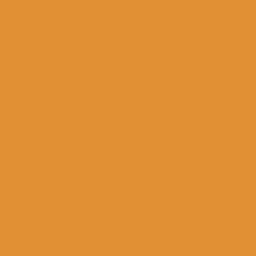

Existem 2 componente(s) com o(s) rótulo(s) {0, 1} na imagem B


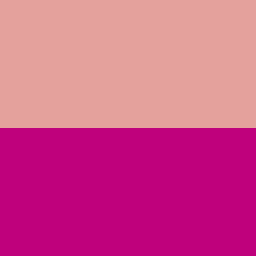

Existem 6 componente(s) com o(s) rótulo(s) {0, 1, 2, 3, 4, 5} na imagem C


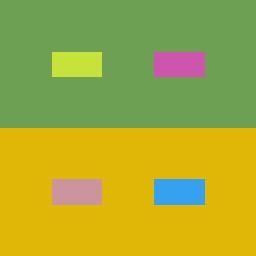

Existem 4 componente(s) com o(s) rótulo(s) {0, 1, 2, 3} na imagem D


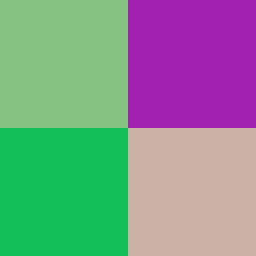

Existem 16 componente(s) com o(s) rótulo(s) {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15} na imagem E


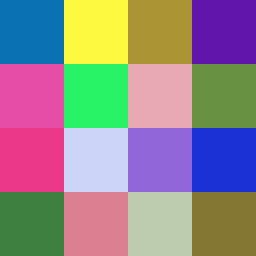

In [3]:
os.makedirs(f'{FILES_DIR}/clustersNumeros/', exist_ok = True)
os.makedirs(f'{FILES_DIR}/clustersCores/', exist_ok = True)

for imageName in ['A', 'B', 'C', 'D', 'E']:
    image = np.asarray(Image.open(f'{FILES_DIR}/tonsCinza/image{imageName}.bmp'))
    labeledImage, coloredImage, labels = HoshenKopelman(image)
    coloredImage = Image.fromarray(coloredImage.astype(np.uint8))

    np.savetxt(f'{FILES_DIR}/clustersNumeros/image{imageName}.txt', labeledImage, fmt = '%d')
    coloredImage.save(f'{FILES_DIR}/clustersCores/image{imageName}_COLORED.bmp')

    print(f'Existem {len(labels)} componente(s) com o(s) rótulo(s) {labels} na imagem {imageName}')
    coloredImage.show()